# Step 0: Import libraries 

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score , classification_report
import scipy.stats as stats
from statsmodels.graphics.mosaicplot import mosaic
from matplotlib.colors import ListedColormap

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import BayesianRidge
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import BaggingClassifier
from mlens.visualization import corrmat

from sklearn.preprocessing import StandardScaler, RobustScaler
from matplotlib.colors import ListedColormap
from sklearn.pipeline import Pipeline 
from feature_engine.imputation import MeanMedianImputer
from feature_engine.imputation import CategoricalImputer
from sklearn.impute import KNNImputer
from feature_engine.discretisation import EqualWidthDiscretiser
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from mlens.ensemble import SuperLearner
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from xgboost import XGBClassifier 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import roc_curve

from sklearn.metrics import (classification_report, 
                             confusion_matrix,
                             roc_auc_score,
                             accuracy_score,
                             precision_score, 
                             recall_score, 
                             f1_score
                            )

import warnings
warnings.simplefilter('ignore')

import requests, json
import geopandas as gpd
#import pycountry

## Step 1: Import Dataset

In [4]:
data = pd.read_csv('./Facebook_Ads_2_TP.csv', encoding =  "ISO-8859-1"
)

In [5]:
data.head()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,NaN,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,NaN,0


In [6]:
data.tail()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
494,Rigel,egestas.blandit.Nam@semvitaealiquam.com,Sao Tome and Principe,19.222746,44969.13495,0
495,Walter,ligula@Cumsociis.ca,Nepal,22.665662,41686.20425,0
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,35.320239,23989.80864,0
497,Pearl,penatibus.et@massanonante.com,Philippines,26.539170,31708.57054,0
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,32.386148,74331.35442,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Names               490 non-null    object 
 1   emails              483 non-null    object 
 2   Country             483 non-null    object 
 3   Time Spent on Site  480 non-null    float64
 4   Salary              479 non-null    float64
 5   Clicked             499 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 23.5+ KB


In [8]:
data.describe()

,Time Spent on Site,Salary,Clicked
count,480.000000,479.000000,499.000000
mean,32.897659,52774.276537,0.501002
std,9.149082,18984.467380,0.500501
min,5.000000,20.000000,0.000000
25%,26.432445,38888.117260,0.000000
50%,33.098900,52623.649480,1.000000
75%,39.193105,65782.900650,1.000000
max,60.000000,100000.000000,1.000000


In [9]:
click = data[data['Clicked'] == 1]
no_click = data[data['Clicked'] == 0]

In [10]:
print('Total = ', len(data))

print('Number of customers who clicked on ad = ', len(click))
print('Percentage clicked = ', 1. * len(click) / len(data) * 100., '%')

print('Did not click = ', len(no_click))
print('Persentage who did not click = ', 1. * len(no_click) / len(data) * 100., '%')

Total =  499
Number of customers who clicked on ad =  250
Percentage clicked =  50.1002004008016 %
Did not click =  249
Persentage who did not click =  49.899799599198396 %


In [11]:
click_count = data['Clicked'].value_counts(dropna = False)
click_count

1    250
0    249
Name: Clicked, dtype: int64

In [12]:
data['Country'].unique()

array(['Bulgaria', 'Belize', 'Algeria', 'Cook Islands', 'Brazil', nan,
       'Syria', 'Czech Republic', 'Armenia', 'Somalia', 'Sint Maarten',
       'Greenland', 'Nicaragua', 'Palestine, State of',
       'United Arab Emirates', 'Gabon', 'Tokelau', 'Portugal', 'Chad',
       'Iraq', 'Sudan', 'Nigeria', 'Madagascar', 'Macedonia', 'Oman',
       'Colombia', 'Namibia', 'Denmark', 'Dominican Republic',
       'Costa Rica', 'Saint Pierre and Miquelon', 'France', 'Senegal',
       'Cambodia', 'Suriname', 'Turkey', 'Ethiopia', 'French Guiana',
       'Bhutan', 'Georgia', 'Mozambique', 'Nauru', 'Timor-Leste',
       'Argentina', 'Taiwan', 'Åland Islands', 'Turks and Caicos Islands',
       'Samoa', 'Vanuatu', 'Mongolia', 'Sri Lanka', 'Guinea-Bissau',
       'Slovenia', 'Benin', 'Cape Verde', 'Paraguay', 'Laos', 'Iceland',
       'Viet Nam', 'Marshall Islands', 'Germany', 'Kyrgyzstan', 'Gambia',
       'Reunion', 'Jordan', 'Slovakia', 'Kiribati',
       'United States Minor Outlying Islands', 

In [13]:
data.Names.unique()

array(['Martina Avila', 'Harlan Barnes', 'Naomi Rodriquez',
       'Jade Cunningham', 'Cedric Leach', 'Carla Hester',
       'Griffin Rivera', 'Orli Casey', 'Marny Obrien', 'Rhonda Chavez',
       'Jerome Rowe', 'Akeem Gibson', 'Quin Smith', 'Tatum Moon',
       'Sharon Sharpe', 'Thomas Williams', 'Blaine Bender',
       'Stephen Lindsey', 'Sloane Mann', 'Athena Wolf', 'Blythe Romero',
       nan, 'Nola Wiggins', 'Micah Wheeler', 'Caryn Hendrix',
       'Hedda Miranda', 'Ulric Lynn', 'Gemma Hendrix', 'Castor Wood',
       'Herman Stevenson', 'Adrienne Bolton', 'Dahlia Cleveland',
       'Keane Browning', 'Quon Hull', 'Coby Charles', 'Amery Cortez',
       'Uriel Bradshaw', 'Fredericka Sanders', 'Christopher Stevens',
       'Rachel Ashley', 'Ryder Shaffer', 'Eric Noel', 'Tamara Guy',
       'Quincy Bell', 'Lee Taylor', 'Kenneth Pope', 'Reese Vance',
       'Magee Davidson', 'Leilani Gross', 'Morgan William',
       'Francesca Cervantes', 'Rafael Peterson', 'Roanna Knox',
       'Marny 

In [14]:
data.emails.unique()

array(['cubilia.Curae.Phasellus@quisaccumsanconvallis.edu',
       'eu.dolor@diam.co.uk',
       'vulputate.mauris.sagittis@ametconsectetueradipiscing.co.uk',
       'malesuada@dignissim.com',
       'felis.ullamcorper.viverra@egetmollislectus.net',
       'mi@Aliquamerat.edu', 'vehicula@at.co.uk',
       'nunc.est.mollis@Suspendissetristiqueneque.co.uk',
       'Phasellus@sedsemegestas.org', 'nec@nuncest.com',
       'ipsum.cursus@dui.org', 'turpis.egestas.Fusce@purus.edu',
       'nulla@ipsum.edu', 'Cras.sed.leo@Seddiamlorem.ca',
       'eget.metus@aaliquetvel.co.uk', 'aliquet.molestie@ut.org',
       'ultrices.posuere.cubilia@pedenonummyut.net',
       'erat.eget.ipsum@tinciduntpede.org', 'at.augue@augue.net',
       'volutpat.Nulla.facilisis@primis.ca', 'Sed.eu@risusNuncac.co.uk',
       'auctor.non@sapien.co.uk', 'Aliquam@augue.edu',
       'arcu.eu@tincidunt.org', 'condimentum.Donec@duiCum.com',
       'scelerisque@magnased.com', nan, 'Nunc.mauris.Morbi@turpis.org',
       'lobor

In [15]:
data.nlargest(50, 'Time Spent on Site')

,Names,emails,Country,Time Spent on Site,Salary,Clicked
54,Rafael Peterson,NaN,Sri Lanka,60.000000,NaN,1
173,Cameron Cash,auctor@ipsum.org,Hong Kong,56.434684,60976.07092,1
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
321,"Mcclure, Avye L.",dictum@lorem.org,Israel,54.002969,44373.39815,1
302,"Knapp, Quamar P.",Maecenas.libero.est@miacmattis.com,El Salvador,53.664216,53210.35911,1
247,MacKenzie O. Fowler,Aliquam.nec.enim@nec.co.uk,Saint Barth?emy,53.153079,43293.50716,1
75,Hedley Greene,eleifend@felis.org,United States Minor Outlying Islands,53.073907,65344.84072,1
262,Heather G. Goodwin,semper.egestas@maurissapien.co.uk,Uganda,53.049426,73043.34184,1
5,Carla Hester,mi@Aliquamerat.edu,NaN,52.009946,80642.65222,1
387,"Munoz, Kennedy K.",dolor@nislelementumpurus.edu,Bouvet Island,51.513734,72735.56023,1


In [16]:
data.sort_values(by = 'Salary').tail(50)

,Names,emails,Country,Time Spent on Site,Salary,Clicked
125,Rigel Craft,diam.eu.dolor@Proin.com,NaN,39.447973,81958.84991,1
470,Diana,purus.ac.tellus@parturientmontesnascetur.org,Guadeloupe,28.274339,82395.63688,1
275,Calvin A. Lancaster,ante.bibendum.ullamcorper@fringilla.net,South Africa,41.102344,82404.98239,1
126,Chaim Lewis,luctus@ut.org,Liberia,25.315093,82452.20502,1
376,"Jensen, Ebony Y.",ac@sagittisNullam.net,Portugal,33.144703,82693.81352,1
282,Clementine X. Powell,quis.pede@Aliquamfringilla.ca,Papua New Guinea,42.066891,83277.54780,1
208,Jeanette Q. Leach,vitae@nisl.net,Liechtenstein,30.265866,84100.27382,1
115,Quamar Cummings,mauris@convallisconvallisdolor.co.uk,Falkland Islands,36.693607,84819.67172,1
416,Stone,neque.non@iaculisaliquet.edu,Colombia,35.766666,85662.40666,1
181,Burton Carroll,NaN,Algeria,46.525525,86554.95970,1


## Step#2 Explore / Visualization dataset

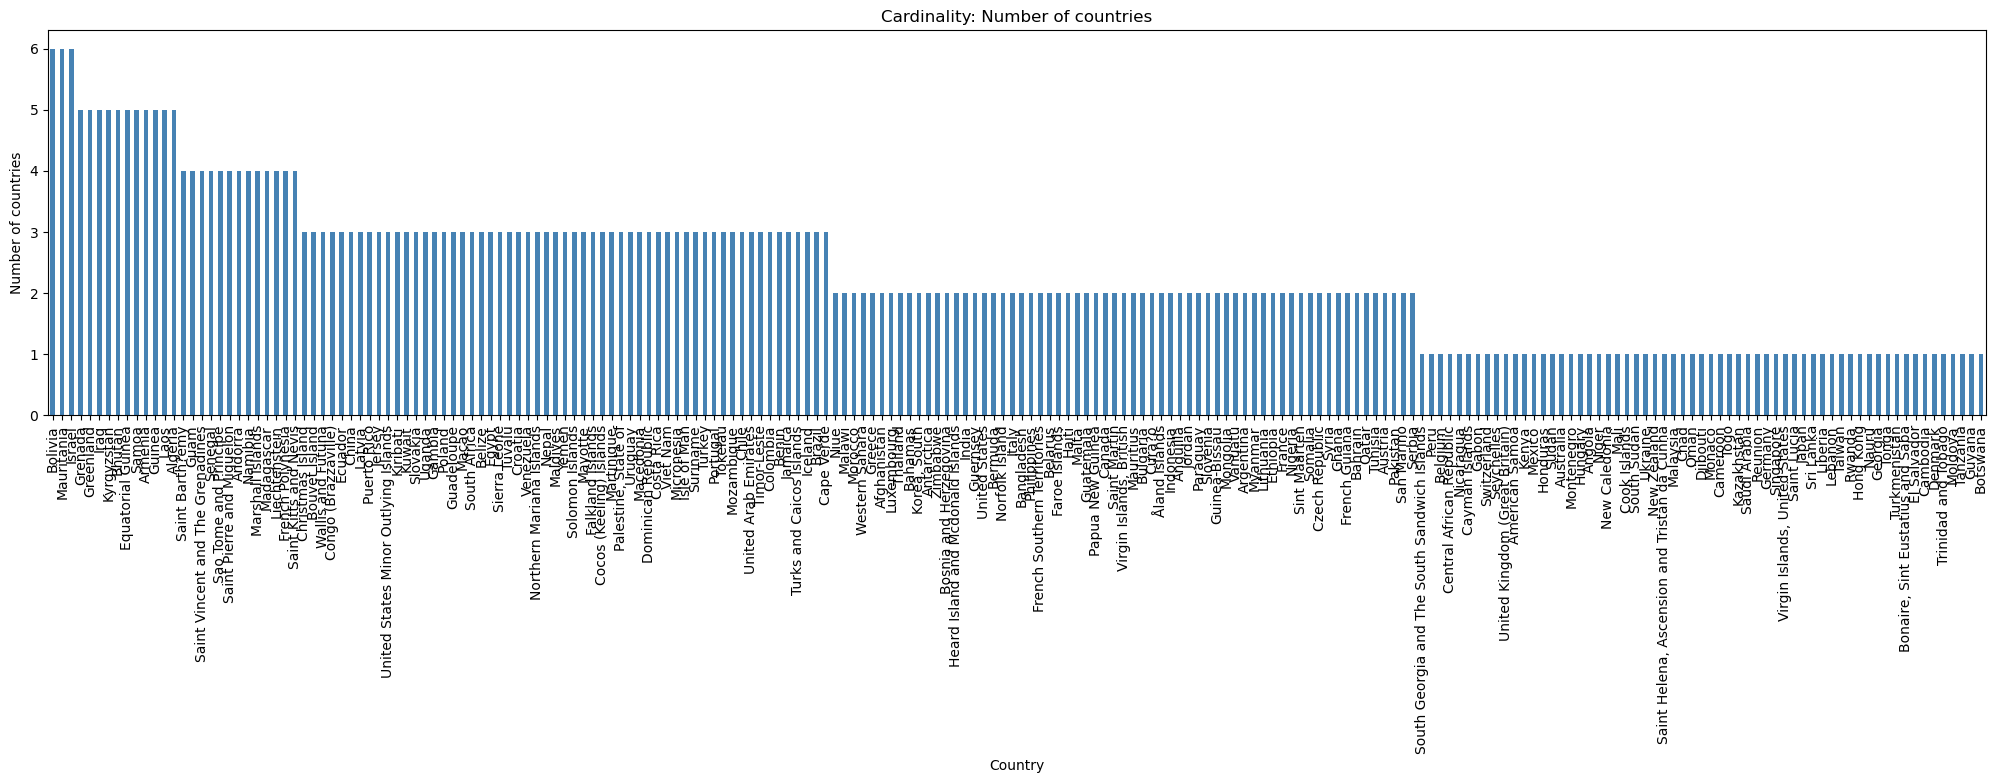

In [17]:
data.Country.value_counts().plot.bar(figsize = (25, 5), color = 'steelblue') 
plt.title('Cardinality: Number of countries')
plt.xlabel('Country')
plt.ylabel('Number of countries')
plt.show()

<AxesSubplot:xlabel='Time Spent on Site', ylabel='Salary'>

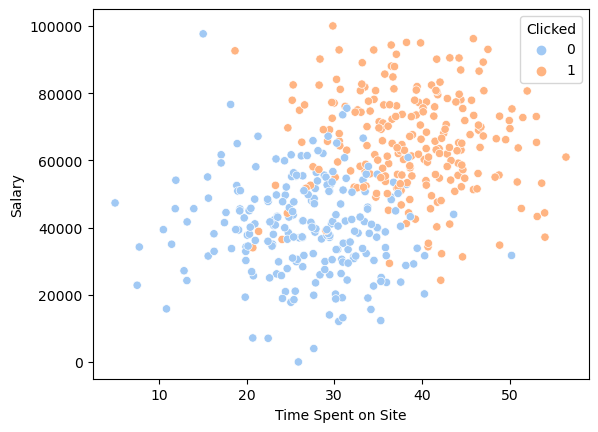

In [21]:
sns.scatterplot(data['Time Spent on Site'], data['Salary'], hue = data['Clicked'], palette = 'pastel')

<AxesSubplot:xlabel='Clicked', ylabel='Salary'>

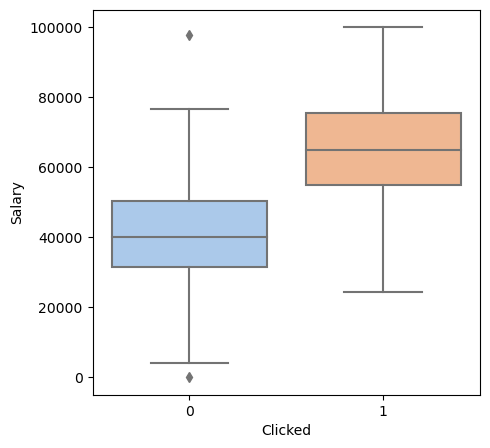

In [22]:
plt.figure(figsize = (5,5))
sns.boxplot(x = 'Clicked', y = 'Salary', data = data, palette = 'pastel')

<AxesSubplot:xlabel='Clicked', ylabel='Time Spent on Site'>

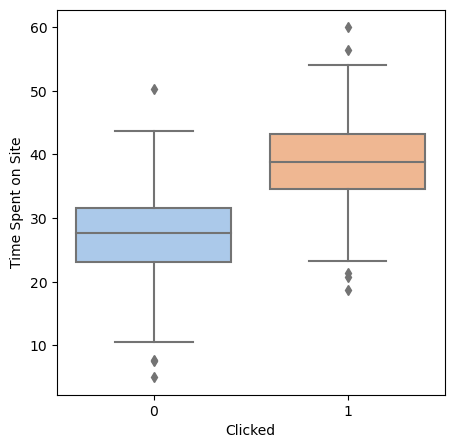

In [23]:
plt.figure(figsize = (5, 5))
sns.boxplot(x = 'Clicked', y = 'Time Spent on Site', data = data, palette = 'pastel')

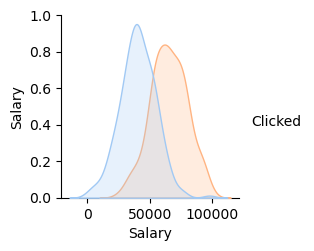

In [24]:
sns.pairplot(data, hue = 'Clicked', vars = ['Salary'], palette = 'pastel')

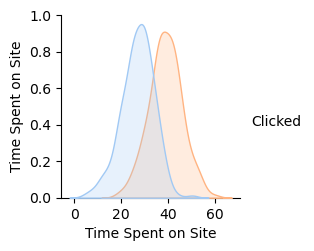

In [25]:
sns.pairplot(data, hue = 'Clicked', vars = ['Time Spent on Site'], palette = 'pastel')

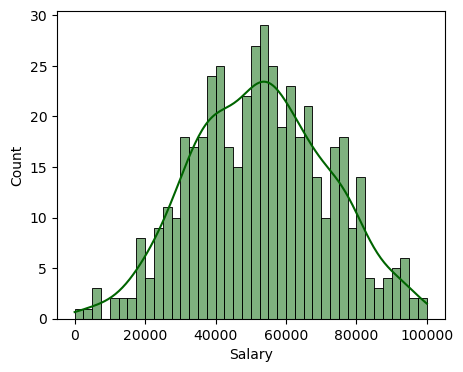

In [85]:
plt.figure(figsize = (5,4))
sns.histplot(data['Salary'], kde = True, bins = 40, color = 'darkgreen')
plt.show()

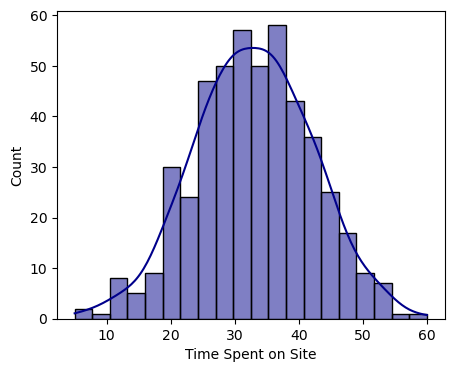

In [43]:
plt.figure(figsize = (5,4))
sns.histplot(data['Time Spent on Site'], kde = True, bins = 20, color='darkblue')
plt.show()

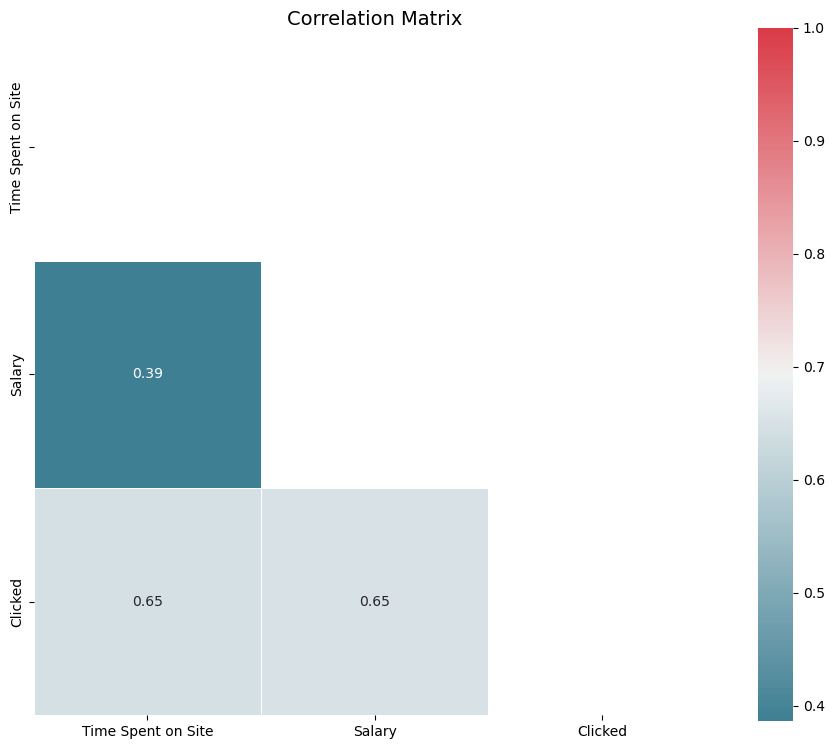

In [44]:
corrmat(data.corr(), inflate=False)
plt.show()

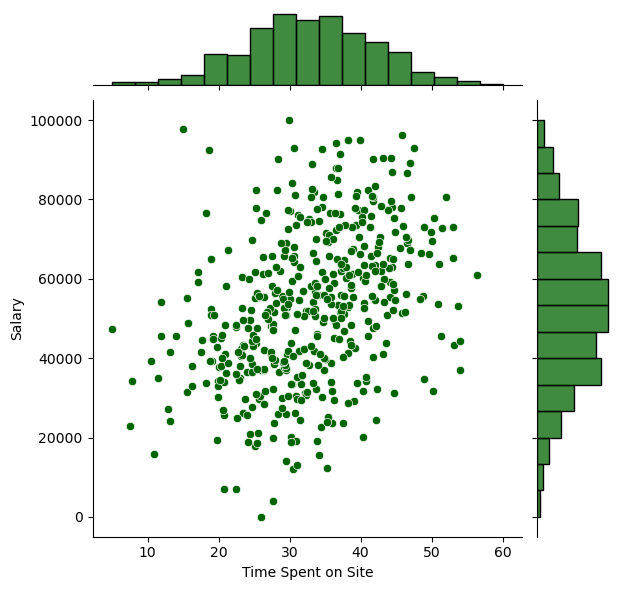

In [61]:
sns.jointplot(x='Time Spent on Site',y='Salary',data=data, color ='darkgreen')

<AxesSubplot:ylabel='miss_ratio'>

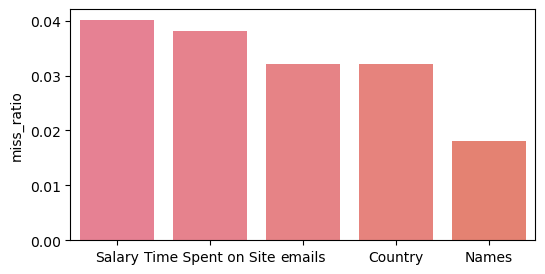

In [50]:
plt.figure(figsize= (6,7))
plt.xticks(rotation='0')
col_na = data.loc[:, data.isna().any()]
mis_ratio = pd.DataFrame((col_na.isna().sum()/col_na.shape[0]).sort_values(ascending = False),
                        columns = ['miss_ratio'])
sns.barplot(mis_ratio.index, mis_ratio.miss_ratio)

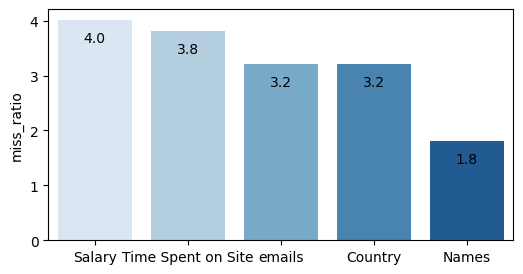

In [58]:
plt.figure(figsize= (6,3))
plt.xticks(rotation='0')
col_na = data.loc[:, data.isna().any()]
mis_ratio = pd.DataFrame((col_na.isna().sum() * 100/col_na.shape[0]).sort_values(ascending = False),
                        columns = ['miss_ratio'])
    
splot = sns.barplot(mis_ratio.index, mis_ratio.miss_ratio, palette = "Blues")
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, -13),
                   textcoords = 'offset points')


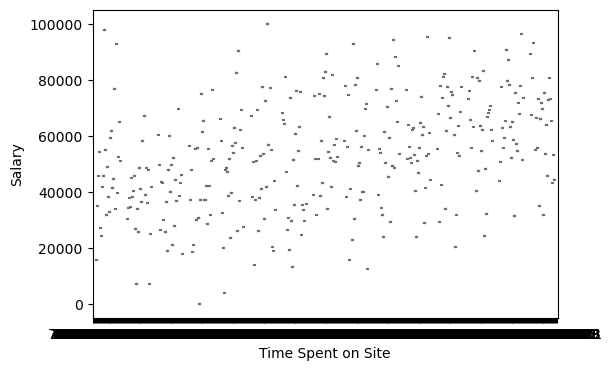

In [86]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Time Spent on Site', y='Salary', data=data)

plt.show()

(0.0, 104999.0)

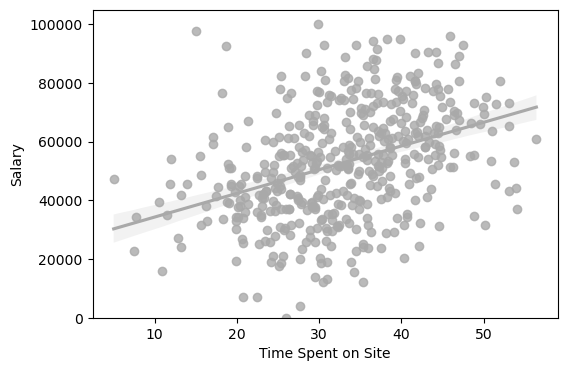

In [87]:
plt.figure(figsize=(6,4))
sns.regplot(x='Time Spent on Site', y='Salary', data=data, color ='darkgrey')
plt.ylim(0,)

In [76]:
def diagnostic_plots(df, variable):
    plt.figure(figsize = (8, 5))
    plt.subplot(1, 3, 1)
    df[variable].hist()
    
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist = 'norm', plot = plt)
    
    plt.subplot(1, 3, 3)
    sns.boxplot(y = df[variable])
    plt.title("Boxplot")
    
    plt.show()

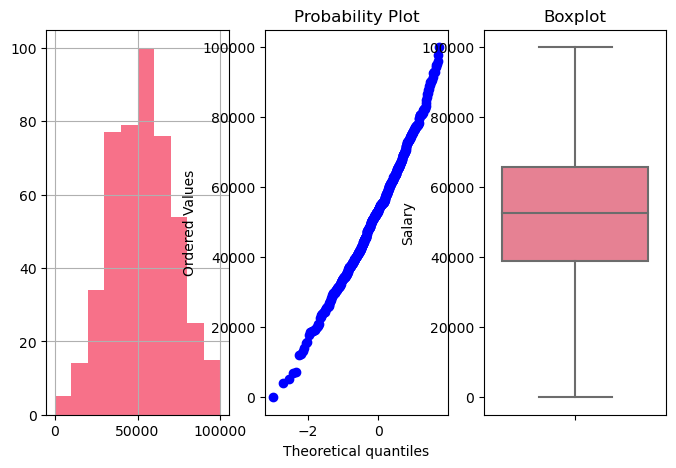

In [77]:
diagnostic_plots(data,'Salary')

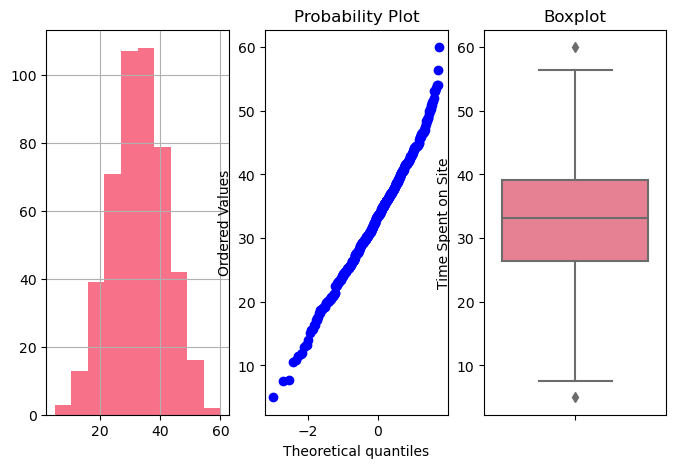

In [78]:
diagnostic_plots(data, 'Time Spent on Site' )

In [79]:
def checkDataForNulls (dataset):
    percent_missing = dataset.isnull().sum() * 100 / len(dataset)
    missing_value_df = pd.DataFrame({'Column': dataset.columns,
                                 'percent_missing': percent_missing})
    print(missing_value_df)


In [80]:
checkDataForNulls(data)

                                Column  percent_missing
Names                            Names         1.803607
emails                          emails         3.206413
Country                        Country         3.206413
Time Spent on Site  Time Spent on Site         3.807615
Salary                          Salary         4.008016
Clicked                        Clicked         0.000000


In [81]:
data.isnull().sum()

Names                  9
emails                16
Country               16
Time Spent on Site    19
Salary                20
Clicked                0
dtype: int64

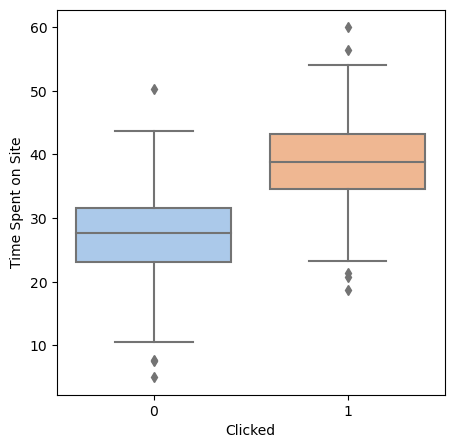

In [88]:
plt.figure(figsize = (5,5))
sns.boxplot(x='Clicked', y = "Time Spent on Site", data = data, palette = 'pastel')
plt.show()

In [89]:
data.groupby('Country').count()

,Names,emails,Time Spent on Site,Salary,Clicked
Country,,,,,
Afghanistan,2,2,2,2,2
Algeria,5,4,5,5,5
American Samoa,1,1,1,1,1
Andorra,4,4,4,4,4
Angola,1,1,1,1,1
...,...,...,...,...,...
Wallis and Futuna,3,3,2,3,3
Western Sahara,2,2,2,2,2
Yemen,3,3,3,3,3


In [90]:
data.groupby('Country').sum()

,Time Spent on Site,Salary,Clicked
Country,,,
Afghanistan,54.282626,147880.03660,1
Algeria,164.667076,320846.42055,2
American Samoa,28.371898,25933.27210,0
Andorra,115.455168,195504.34003,1
Angola,25.254177,44756.53074,0
...,...,...,...
Wallis and Futuna,59.863409,123547.22405,1
Western Sahara,67.294279,163720.65542,2
Yemen,100.297462,123155.79092,2


In [91]:
data.groupby('Country').mean()

,Time Spent on Site,Salary,Clicked
Country,,,
Afghanistan,27.141313,73940.018300,0.500000
Algeria,32.933415,64169.284110,0.400000
American Samoa,28.371898,25933.272100,0.000000
Andorra,28.863792,48876.085007,0.250000
Angola,25.254177,44756.530740,0.000000
...,...,...,...
Wallis and Futuna,29.931704,41182.408017,0.333333
Western Sahara,33.647139,81860.327710,1.000000
Yemen,33.432487,41051.930307,0.666667


In [92]:
data.groupby('Country').median()

,Time Spent on Site,Salary,Clicked
Country,,,
Afghanistan,27.141313,73940.018300,0.5
Algeria,28.709412,64980.505900,0.0
American Samoa,28.371898,25933.272100,0.0
Andorra,31.542791,51615.104195,0.0
Angola,25.254177,44756.530740,0.0
...,...,...,...
Wallis and Futuna,29.931704,34721.748620,0.0
Western Sahara,33.647139,81860.327710,1.0
Yemen,33.349037,40214.076710,1.0


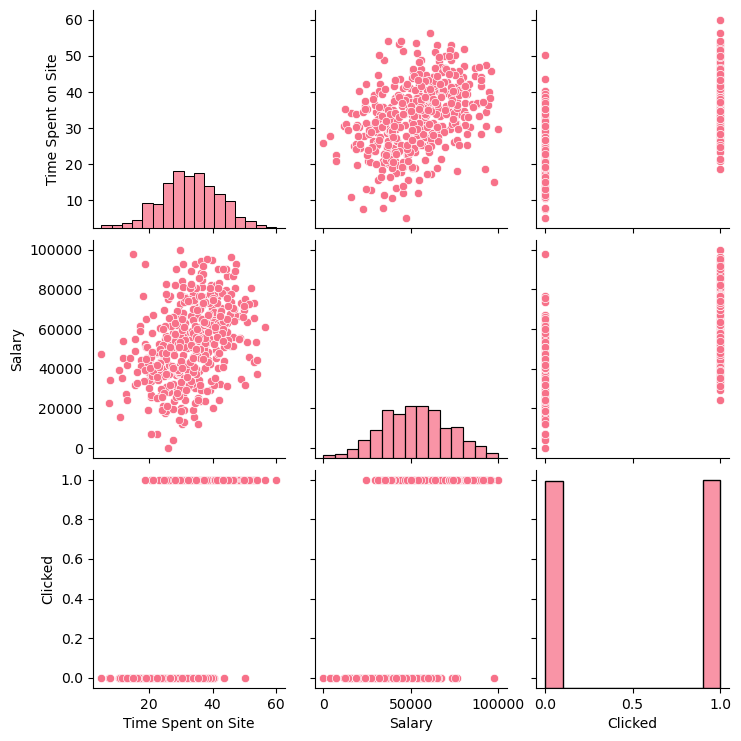

In [207]:
cols = ['Time Spent on Site', 'Salary', 'Clicked']
sns_plot = sns.pairplot(data[cols], palette = 'pastel')
sns_plot.savefig('pairplot.png')

In [ ]:
ax2 = world.plot(figsize=(50,50), edgecolor=u'gray', cmap='Pastel1')

world[world.name == "Bulgaria"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Belize"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Algeria"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Cook Islands"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Brazil"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Syria"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Czech Republic"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Armenia"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Somalia"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Sint Maarten"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Greenland"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Nicaragua"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Palestine, State of"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "United Arab Emirates"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Gabon"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Namibia"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Libya"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Tokelau"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Portugal"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Chad"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Iraq"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Sudan"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Nigeria"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Madagascar"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Nigeria"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Macedonia"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Libya"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Namibia"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Oman"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Colombia"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Denmark"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Namibia"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Libya"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Namibia"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Dominican Republic"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Saint Pierre and Miquelon"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Senegal"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Cambodia"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Suriname"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Turkey"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Ethiopia"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "French Guiana"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Bhutan"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Georgia"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Mozambique"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Timor-Leste"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Argentina"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Taiwan"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Åland Islands"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Turks and Caicos Islands"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Samoa"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Vanuatu"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Mongolia"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Sri Lanka"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Guinea-Bissau"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Slovenia"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Benin"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Cape Verde"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Paraguay"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Laos"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Iceland"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Viet Nam"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Marshall Islands"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Germany"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Kyrgyzstan"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Gambia"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Reunion"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Jordan"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Slovakia"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Kiribati"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "United States Minor Outlying Islands"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Puerto Rico"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Guinea"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "China"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Ecuador"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Anguilla"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Kazakhstan"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Jersey"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Macao"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Indonesia"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Cameroon"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Myanmar"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Central African Republic"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Bolivia"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Egypt"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Tuvalu"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Qatar"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Venezuela"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Togo"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Nepal"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Saudi Arabia"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "San Marino"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Saint Lucia"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Solomon Islands"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Falkland Islands"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Israel"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Christmas Island"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Liechtenstein"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Mayotte"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Saint Kitts and Nevis"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Maldives"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Lebanon"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Monaco"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Martinique"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Guadeloupe"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Equatorial Guinea"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "South Africa"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Wallis and Futuna"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Pakistan"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Bahrain"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Djibouti"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Serbia"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Peru"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Lithuania"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Zimbabwe"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Mauritius"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Uganda"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Kenya"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Kuwait"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Greece"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Bouvet Island"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Bahamas"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Hong Kong"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "French Polynesia"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Sierra Leone"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Heard Island and Mcdonald Islands"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Virgin Islands, British"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Singapore"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Cocos (Keeling) Islands"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Saint Martin"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Croatia"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Malta"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Mauritania"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Guyana"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Haiti"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Poland"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Guernsey"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "United States"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Italy"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Bangladesh"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Philippines"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Jamaica"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Belarus"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Guatemala"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Tonga"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Turkmenistan"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Canada"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "India"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Rwanda"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Micronesia"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Switzerland"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Chile"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Uruguay"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Afghanistan"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Belgium"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Honduras"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Mexico"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Australia"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Luxembourg"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Hungary"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Angola"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Niger"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Mali"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Malawi"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Ukraine"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Malaysia"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Botswana"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Montenegro"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Montenegro"].plot(edgecolor=u'gray', color='red', ax=ax2)
world[world.name == "Montenegro"].plot(edgecolor=u'gray', color='red', ax=ax2)

# the place to plot additional vector data (points, lines)

plt.ylabel('Latitude')
plt.xlabel('Longitude')

#ax2.axis('scaled')
plt.show()

In [95]:
data

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,NaN,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,NaN,0
...,...,...,...,...,...,...
494,Rigel,egestas.blandit.Nam@semvitaealiquam.com,Sao Tome and Principe,19.222746,44969.13495,0
495,Walter,ligula@Cumsociis.ca,Nepal,22.665662,41686.20425,0
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,35.320239,23989.80864,0
497,Pearl,penatibus.et@massanonante.com,Philippines,26.539170,31708.57054,0


In [96]:
data.drop(['Names', 'emails', 'Country'], axis = 1, inplace = True)

In [97]:
data

,Time Spent on Site,Salary,Clicked
0,25.649648,55330.06006,0
1,32.456107,NaN,1
2,20.945978,41098.60826,0
3,54.039325,37143.35536,1
4,34.249729,NaN,0
...,...,...,...
494,19.222746,44969.13495,0
495,22.665662,41686.20425,0
496,35.320239,23989.80864,0
497,26.539170,31708.57054,0


# Step 2: Splitting dataset

In [98]:
x = data.drop('Clicked', axis = 1).values
y = data['Clicked'].values

In [99]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size = 0.2,
    random_state = 0
)

In [100]:
x_train.shape, x_test.shape

((399, 2), (100, 2))

In [101]:
x_train

array([[4.58671019e+01, 9.62048047e+04],
       [4.45466301e+01, 6.50837736e+04],
       [4.14575777e+01, 7.59232499e+04],
       [           nan, 5.78413598e+04],
       [4.28813696e+01, 6.19083982e+04],
       [2.09930210e+01, 3.61713548e+04],
       [3.65168217e+01, 8.80452187e+04],
       [4.41859134e+01, 6.52458746e+04],
       [3.65010819e+01, 4.83171276e+04],
       [3.07305865e+01, 4.70127276e+04],
       [4.42504089e+01, 7.96791384e+04],
       [2.56769196e+01, 2.98514115e+04],
       [2.44172577e+01, 4.96602012e+04],
       [4.06982326e+01, 3.42811188e+04],
       [3.11819570e+01, 6.07724248e+04],
       [2.29045330e+01, 3.44986590e+04],
       [4.46614374e+01, 7.54262811e+04],
       [2.82513675e+01, 5.72757294e+04],
       [4.66338684e+01, 6.38534268e+04],
       [3.14744305e+01, 2.43835039e+04],
       [2.52541766e+01, 4.47565307e+04],
       [3.62967505e+01, 2.93548248e+04],
       [1.92478156e+01, 4.55278159e+04],
       [2.03325090e+01, 3.80574069e+04],
       [2.409295

In [102]:
x_test

array([[3.96323569e+01, 7.72452348e+04],
       [2.75796440e+01, 5.80939678e+04],
       [2.64398469e+01, 4.20160028e+04],
       [2.13738297e+01, 3.88616000e+04],
       [4.48934669e+01, 7.18404046e+04],
       [2.50567822e+01, 1.77599339e+04],
       [1.39808525e+01, 4.56227404e+04],
       [2.43310544e+01, 5.98735170e+04],
       [3.26071089e+01, 5.18356482e+04],
       [2.95762982e+01, 5.28261559e+04],
       [2.00896906e+01, 3.77504505e+04],
       [3.53246912e+01,            nan],
       [3.02905373e+01, 6.51319974e+04],
       [4.87944133e+01, 5.56330384e+04],
       [3.06380380e+01, 6.43160472e+04],
       [7.52147958e+00, 2.28392538e+04],
       [2.65417428e+01, 5.09679878e+04],
       [2.97587774e+01, 3.04451602e+04],
       [3.05571377e+01, 9.28650557e+04],
       [3.45416750e+01, 7.81564644e+04],
       [5.09854022e+01, 6.36950472e+04],
       [2.13043705e+01, 6.71681827e+04],
       [5.02276799e+01, 3.17073190e+04],
       [4.15015106e+01, 6.56909720e+04],
       [1.888158

In [103]:
checkDataForNulls(data)

                                Column  percent_missing
Time Spent on Site  Time Spent on Site         3.807615
Salary                          Salary         4.008016
Clicked                        Clicked         0.000000


# Step 4: Checking imputers

## SimpleImputer

In [104]:
checkDataForNulls(data)

                                Column  percent_missing
Time Spent on Site  Time Spent on Site         3.807615
Salary                          Salary         4.008016
Clicked                        Clicked         0.000000


In [105]:
data_imputed = data.copy()

In [106]:
imp_most_frequent = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

In [107]:
def comparison_chat(data, data_imputed, var, value):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    data[var].plot(kind = 'kde', ax = ax, color = 'blue', linewidth=4) 
    data_imputed[var].plot(kind = 'kde', ax = ax, dashes=[30, 5, 10, 5], color = 'red')

    lines, labels = ax.get_legend_handles_labels()
    labels = ['Original variable', 'Imputed Variable']
    ax.legend(lines, labels, loc = 'best')
    plt.title(var)

In [108]:
imp_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean')

data_imputed['Time Spent on Site'] = imp_mean.fit_transform(data_imputed['Time Spent on Site'].values.reshape(-1, 1) )


imp_median = SimpleImputer(missing_values = np.nan, strategy = 'median')

data_imputed['Time Spent on Site'] = imp_median.fit_transform(data_imputed['Time Spent on Site'].values.reshape(-1, 1) )


imp_constant = SimpleImputer(missing_values = np.nan, strategy = 'constant')

data_imputed['Time Spent on Site'] = imp_constant.fit_transform(data_imputed['Time Spent on Site'].values.reshape(-1, 1) )


In [109]:
print('Original variable variance: ', data['Time Spent on Site'].var())
print('Variance after imputation: ', data_imputed['Time Spent on Site'].var())

Original variable variance:  83.70570710349308
Variance after imputation:  80.51211586862087


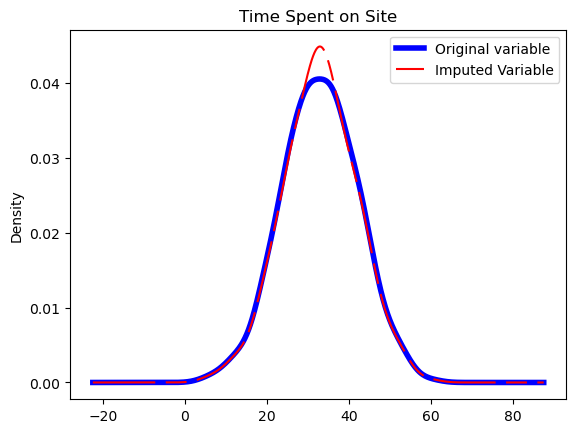

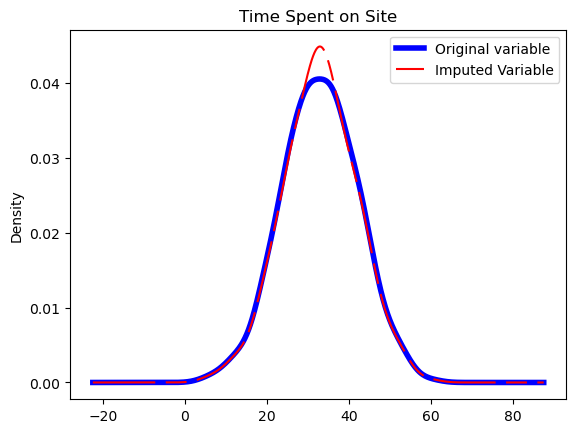

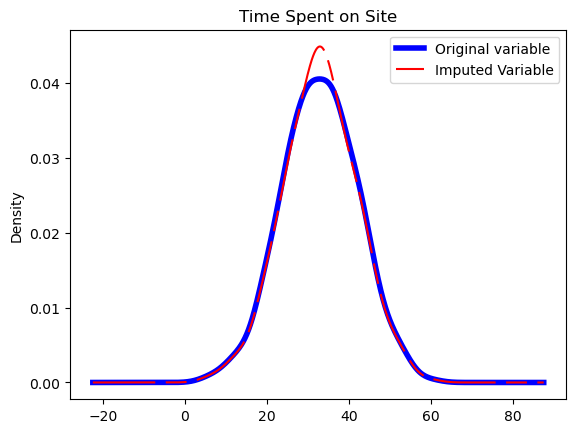

In [110]:
comparison_chat(data, data_imputed, 'Time Spent on Site', imp_mean)
comparison_chat(data, data_imputed, 'Time Spent on Site', imp_median)
comparison_chat(data, data_imputed, 'Time Spent on Site', imp_constant)

In [111]:
data_imputed['Salary'] = imp_mean.fit_transform(data_imputed['Salary'].values.reshape(-1, 1) )


In [112]:
print('Original variable variance: ', data['Salary'].var())
print('Variance after imputation: ', data_imputed['Salary'].var())

Original variable variance:  360410001.7003704
Variance after imputation:  345935704.4433273


## KNN Imputer

In [113]:
data_knn = data.copy()

In [114]:
KNN = KNNImputer(n_neighbors = 5)

data_knn['Time Spent on Site'] = KNN.fit_transform(data_knn['Time Spent on Site'].values.reshape(-1, 1) )

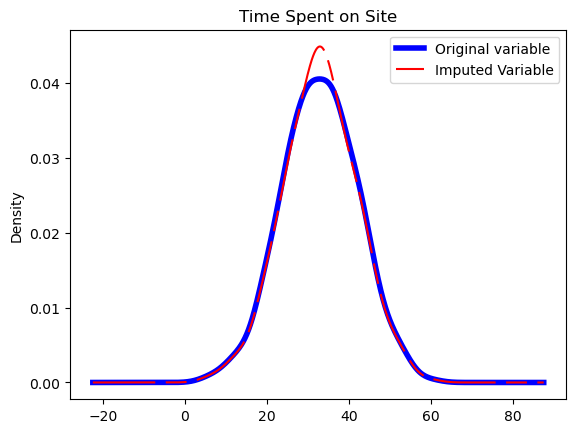

In [115]:
comparison_chat(data, data_knn, 'Time Spent on Site', KNNImputer)

In [116]:
print('Original variable variance: ', data['Time Spent on Site'].var())
print('Variance after imputation: ', data_knn['Time Spent on Site'].var())

Original variable variance:  83.70570710349308
Variance after imputation:  80.51211586862087


In [117]:
data_knn['Salary'] = KNN.fit_transform(data_knn['Salary'].values.reshape(-1, 1) )

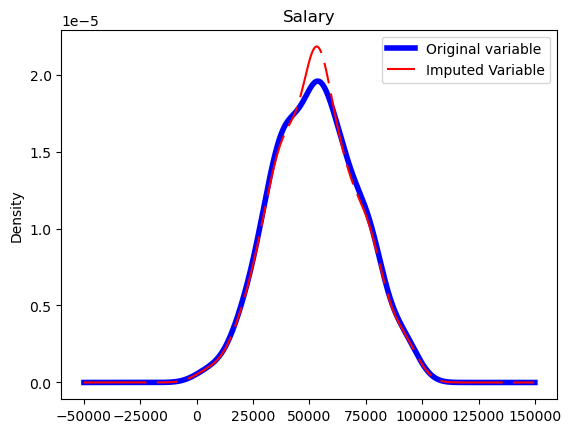

In [118]:
comparison_chat(data, data_knn, 'Salary', KNN)

In [119]:
print('Original variable variance: ', data['Salary'].var())
print('Variance after imputation: ', data_knn['Salary'].var())

Original variable variance:  360410001.7003704
Variance after imputation:  345935704.4433273


# Step 3: Checking Scalers

## MinMaxScaling

In [120]:
x_train = pd.DataFrame(x_train, columns = ['Time Spent on Site', 'Salary'])
x_test = pd.DataFrame(x_test, columns = ['Time Spent on Site', 'Salary'])

In [121]:
scaler = MinMaxScaler()

scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [122]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_test.columns)

In [123]:
np.round(x_train.describe(), 1)

,Time Spent on Site,Salary
count,380.0,384.0
mean,33.0,52648.9
std,8.9,19004.0
min,5.0,20.0
25%,26.5,38455.4
50%,33.2,52605.3
75%,39.5,66189.5
max,54.0,97646.2


In [124]:
np.round(x_train_scaled.describe(), 1)

,Time Spent on Site,Salary
count,380.0,384.0
mean,0.6,0.5
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.4
50%,0.6,0.5
75%,0.7,0.7
max,1.0,1.0


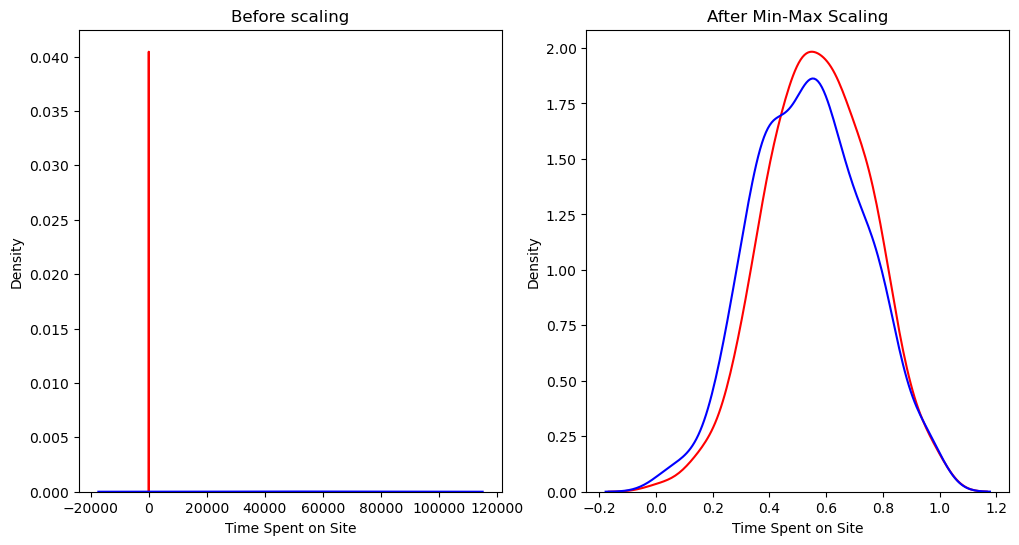

In [125]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 6))

#before scaling
ax1.set_title("Before scaling")
sns.kdeplot(x_train['Time Spent on Site'], ax = ax1, color ='red')
sns.kdeplot(x_train['Salary'], ax = ax1, color ='blue')


#after scaling
ax2.set_title('After Min-Max Scaling')
sns.kdeplot(x_train_scaled['Time Spent on Site'], ax = ax2, color ='red')
sns.kdeplot(x_train_scaled['Salary'], ax = ax2,color ='blue')


plt.show()

## Robust scaling

In [126]:
x_train = pd.DataFrame(x_train, columns = ['Time Spent on Site', 'Salary'])
x_test = pd.DataFrame(x_test, columns = ['Time Spent on Site', 'Salary'])

In [129]:
scaler = RobustScaler()

scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train_scaled)
x_test_scaled = scaler.transform(x_test_scaled)

In [130]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_test.columns)

In [131]:
np.round(x_train.describe(), 1) 

,Time Spent on Site,Salary
count,380.0,384.0
mean,33.0,52648.9
std,8.9,19004.0
min,5.0,20.0
25%,26.5,38455.4
50%,33.2,52605.3
75%,39.5,66189.5
max,54.0,97646.2


In [132]:
np.round(x_train_scaled.describe(), 1) 

,Time Spent on Site,Salary
count,380.0,384.0
mean,-2.5,-1.9
std,0.0,0.0
min,-2.6,-1.9
25%,-2.5,-1.9
50%,-2.5,-1.9
75%,-2.5,-1.9
max,-2.5,-1.9


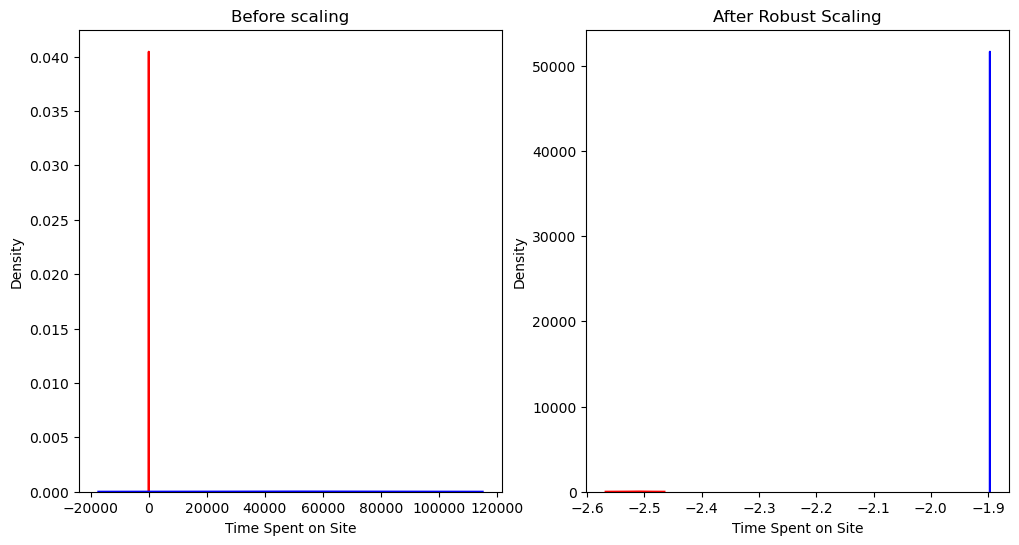

In [133]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 6))

#before scaling
ax1.set_title("Before scaling")
sns.kdeplot(x_train['Time Spent on Site'], ax = ax1, color ='red')
sns.kdeplot(x_train['Salary'], ax = ax1, color ='blue')


#after scaling
ax2.set_title('After Robust Scaling')
sns.kdeplot(x_train_scaled['Time Spent on Site'], ax = ax2, color ='red')
sns.kdeplot(x_train_scaled['Salary'], ax = ax2, color ='blue')


plt.show()

# Step 4: Training models

## GaussianNB 

In [134]:
algorithms_model_list = []    

roc_auc_score_list = []
precision_score_list = []
recall_score_list = []
f1_score_list = []

In [135]:
num_var = ['Time Spent on Site', 'Salary']

In [136]:
pipe_GaussianNB =Pipeline([('imputer_num', MeanMedianImputer(imputation_method = 'median', variables = num_var)),
               ('discretizer', EqualWidthDiscretiser(bins = 10, variables = num_var)),
               ('scaler', SklearnTransformerWrapper(transformer = MinMaxScaler(), variables = num_var)),
               ('GNB', GaussianNB ())
               ])

In [137]:
GaussianNB_param_grid = {
    'imputer_num__imputation_method':['median', 'mean'],
    'discretizer__bins':[3, 5, 7, 9, 10, 15],
    'GNB__priors':[None],
    'GNB__var_smoothing': [0.00000001, 0.000000001, 0.00000001]
}

In [138]:
GaussianNB_grid_search = GridSearchCV(estimator = pipe_GaussianNB, param_grid = GaussianNB_param_grid, 
                              cv = 5, n_jobs = -1, scoring = 'accuracy')

In [139]:
GaussianNB_grid_search.fit(x_train, y_train) 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer_num',
                                        MeanMedianImputer(variables=['Time '
                                                                     'Spent on '
                                                                     'Site',
                                                                     'Salary'])),
                                       ('discretizer',
                                        EqualWidthDiscretiser(variables=['Time '
                                                                         'Spent '
                                                                         'on '
                                                                         'Site',
                                                                         'Salary'])),
                                       ('scaler',
                                        SklearnTransformerWrapper(transformer=MinMaxScaler(),
 

In [140]:
GaussianNB_grid_search.best_params_

{'GNB__priors': None,
 'GNB__var_smoothing': 1e-08,
 'discretizer__bins': 15,
 'imputer_num__imputation_method': 'mean'}

In [141]:
GaussianNB_y_pred_train = GaussianNB_grid_search.predict(x_train)
GaussianNB_y_pred_test = GaussianNB_grid_search.predict(x_test)

print('Train set')
print('GaussianNB roc-auc: {}'. format(roc_auc_score(y_train, GaussianNB_y_pred_train)))

print('Test set')
print('GaussianNB roc-auc: {}'. format(roc_auc_score(y_test, GaussianNB_y_pred_test)))

Train set
GaussianNB roc-auc: 0.8998944670586461
Test set
GaussianNB roc-auc: 0.8605769230769231


In [142]:
print(classification_report(y_train, GaussianNB_y_pred_train))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       201
           1       0.88      0.92      0.90       198

    accuracy                           0.90       399
   macro avg       0.90      0.90      0.90       399
weighted avg       0.90      0.90      0.90       399



In [143]:
print(classification_report(y_test, GaussianNB_y_pred_test))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        48
           1       0.88      0.85      0.86        52

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100



In [144]:
algorithms_model_list.append('GaussianNB')
roc_auc_score_list.append(round(roc_auc_score(y_test, GaussianNB_y_pred_test), 3))
precision_score_list.append(round(precision_score(y_test, GaussianNB_y_pred_test), 3))
recall_score_list.append(round(recall_score(y_test, GaussianNB_y_pred_test), 3))
f1_score_list.append(round(f1_score(y_test, GaussianNB_y_pred_test), 3))

# Bagging classification

In [145]:
pipe_BaggingClassifier =Pipeline([('imputer_num', MeanMedianImputer(imputation_method = 'median', variables = num_var)),
               ('discretizer', EqualWidthDiscretiser(bins = 10, variables = num_var)),
               ('scaler', SklearnTransformerWrapper(transformer = RobustScaler(), variables = num_var)),
               ('BaggingClassifier', BaggingClassifier ())
               ])

In [146]:
BaggingClassifier_param_grid = {
    'imputer_num__imputation_method':['median', 'mean'],
    'discretizer__bins':[3, 5, 7, 9, 10, 15],
    'BaggingClassifier__n_estimators':[10, 100, 1000],
}

In [147]:
BaggingClassifier_grid_search = GridSearchCV(estimator = pipe_BaggingClassifier, param_grid = BaggingClassifier_param_grid, 
                              cv = 5, n_jobs = -1, scoring = 'accuracy')

In [148]:
BaggingClassifier_grid_search.fit(x_train, y_train) 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer_num',
                                        MeanMedianImputer(variables=['Time '
                                                                     'Spent on '
                                                                     'Site',
                                                                     'Salary'])),
                                       ('discretizer',
                                        EqualWidthDiscretiser(variables=['Time '
                                                                         'Spent '
                                                                         'on '
                                                                         'Site',
                                                                         'Salary'])),
                                       ('scaler',
                                        SklearnTransformerWrapper(transformer=RobustScaler(),
 

In [149]:
BaggingClassifier_grid_search.best_params_

{'BaggingClassifier__n_estimators': 100,
 'discretizer__bins': 15,
 'imputer_num__imputation_method': 'mean'}

In [150]:
BaggingClassifier_y_pred_train = BaggingClassifier_grid_search.predict(x_train)
BaggingClassifier_y_pred_test = BaggingClassifier_grid_search.predict(x_test)

print('Train set')
print('BaggingClassifier roc-auc: {}'. format(roc_auc_score(y_train, BaggingClassifier_y_pred_train)))

print('Test set')
print('BaggingClassifier roc-auc: {}'. format(roc_auc_score(y_test, BaggingClassifier_y_pred_test)))

Train set
BaggingClassifier roc-auc: 0.9147067691843811
Test set
BaggingClassifier roc-auc: 0.8621794871794871


In [151]:
print(classification_report(y_train, BaggingClassifier_y_pred_train))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       201
           1       0.92      0.90      0.91       198

    accuracy                           0.91       399
   macro avg       0.91      0.91      0.91       399
weighted avg       0.91      0.91      0.91       399



In [152]:
print(classification_report(y_test, BaggingClassifier_y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86        48
           1       0.91      0.81      0.86        52

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.87      0.86      0.86       100



In [153]:
algorithms_model_list.append('BaggingClassifier')
roc_auc_score_list.append(round(roc_auc_score(y_test, BaggingClassifier_y_pred_test), 3))
precision_score_list.append(round(precision_score(y_test, BaggingClassifier_y_pred_test), 3))
recall_score_list.append(round(recall_score(y_test, BaggingClassifier_y_pred_test), 3))
f1_score_list.append(round(f1_score(y_test, BaggingClassifier_y_pred_test), 3))

# # K-Neigbors Classifier

In [154]:
pipe_KNC =Pipeline([('imputer_num', MeanMedianImputer(imputation_method = 'median', variables = num_var)),
               ('discretizer', EqualWidthDiscretiser(bins = 10, variables = num_var)),
               ('scaler', SklearnTransformerWrapper(transformer = RobustScaler(), variables = num_var)),
               ('KNC', KNeighborsClassifier ())
               ])

In [155]:
KNC_param_grid = {
    'imputer_num__imputation_method':['median', 'mean'],
    'discretizer__bins':[3, 5, 7, 9, 10, 15],
    'KNC__weights': ['uniform', 'distance'],
    'KNC__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'KNC__n_neighbors': [3, 5, 7, 9, 11],
    'KNC__leaf_size': [30, 35, 40, 50, 60]
}

In [156]:
KNC_grid_search = GridSearchCV(estimator = pipe_KNC, param_grid = KNC_param_grid, 
                              cv = 5, n_jobs = -1, scoring = 'roc_auc')

In [157]:
KNC_grid_search.fit(x_train, y_train) 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer_num',
                                        MeanMedianImputer(variables=['Time '
                                                                     'Spent on '
                                                                     'Site',
                                                                     'Salary'])),
                                       ('discretizer',
                                        EqualWidthDiscretiser(variables=['Time '
                                                                         'Spent '
                                                                         'on '
                                                                         'Site',
                                                                         'Salary'])),
                                       ('scaler',
                                        SklearnTransformerWrapper(transformer=RobustScaler(),
 

In [158]:
KNC_grid_search.best_params_

{'KNC__algorithm': 'ball_tree',
 'KNC__leaf_size': 30,
 'KNC__n_neighbors': 11,
 'KNC__weights': 'uniform',
 'discretizer__bins': 15,
 'imputer_num__imputation_method': 'mean'}

In [159]:
KNC_y_pred_train = KNC_grid_search.predict(x_train)
KNC_y_pred_test = KNC_grid_search.predict(x_test)

print('Train set')
print('KNC roc-auc: {}'. format(roc_auc_score(y_train, KNC_y_pred_train)))

print('Test set')
print('KNC roc-auc: {}'. format(roc_auc_score(y_test, KNC_y_pred_test)))

Train set
KNC roc-auc: 0.9023443389115032
Test set
KNC roc-auc: 0.8317307692307692


In [160]:
print(classification_report(y_train, KNC_y_pred_train))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       201
           1       0.89      0.91      0.90       198

    accuracy                           0.90       399
   macro avg       0.90      0.90      0.90       399
weighted avg       0.90      0.90      0.90       399



In [161]:
print(classification_report(y_test, KNC_y_pred_test))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        48
           1       0.87      0.79      0.83        52

    accuracy                           0.83       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.83      0.83      0.83       100



In [162]:
algorithms_model_list.append('KNeighborsClassifier')
roc_auc_score_list.append(round(roc_auc_score(y_test, KNC_y_pred_test), 3))
precision_score_list.append(round(precision_score(y_test, KNC_y_pred_test), 3))
recall_score_list.append(round(recall_score(y_test, KNC_y_pred_test), 3))
f1_score_list.append(round(f1_score(y_test, KNC_y_pred_test), 3))

## RandomForestClassifier

In [163]:
pipe_RFC =Pipeline([('imputer_num', MeanMedianImputer(imputation_method = 'median', variables = num_var)),
               ('discretizer', EqualWidthDiscretiser(bins = 10, variables = num_var)),
               ('scaler', SklearnTransformerWrapper(transformer = RobustScaler(), variables = num_var)),
               ('RFC', RandomForestClassifier ())
               ])

In [164]:
RFC_param_grid = {
    'imputer_num__imputation_method':['median', 'mean'],
    'discretizer__bins':[3, 5, 7, 9, 10, 15],
    'RFC__n_estimators': [100, 150, 200], 
    'RFC__criterion': ["gini", "entropy"],
    'RFC__max_depth': [3, 5, 7, 9], 
    'RFC__max_features': ["auto", "sqrt", "log2"]
}

In [165]:
RFC_grid_search = GridSearchCV(estimator = pipe_RFC, param_grid = RFC_param_grid, 
                              cv = 5, n_jobs = -1, scoring = 'accuracy')

In [166]:
RFC_grid_search.fit(x_train, y_train) 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer_num',
                                        MeanMedianImputer(variables=['Time '
                                                                     'Spent on '
                                                                     'Site',
                                                                     'Salary'])),
                                       ('discretizer',
                                        EqualWidthDiscretiser(variables=['Time '
                                                                         'Spent '
                                                                         'on '
                                                                         'Site',
                                                                         'Salary'])),
                                       ('scaler',
                                        SklearnTransformerWrapper(transformer=RobustScaler(),
 

In [167]:
RFC_grid_search.best_params_

{'RFC__criterion': 'gini',
 'RFC__max_depth': 5,
 'RFC__max_features': 'auto',
 'RFC__n_estimators': 100,
 'discretizer__bins': 15,
 'imputer_num__imputation_method': 'mean'}

In [168]:
RFC_y_pred_train = RFC_grid_search.predict(x_train)
RFC_y_pred_test = RFC_grid_search.predict(x_test)

print('Train set')
print('RFC roc-auc: {}'. format(roc_auc_score(y_train, RFC_y_pred_train)))

print('Test set')
print('RFC roc-auc: {}'. format(roc_auc_score(y_test, RFC_y_pred_test)))

Train set
RFC roc-auc: 0.9147444595205789
Test set
RFC roc-auc: 0.8613782051282052


In [169]:
print(classification_report(y_train, RFC_y_pred_train))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       201
           1       0.92      0.91      0.91       198

    accuracy                           0.91       399
   macro avg       0.91      0.91      0.91       399
weighted avg       0.91      0.91      0.91       399



In [170]:
print(classification_report(y_test, RFC_y_pred_test))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86        48
           1       0.90      0.83      0.86        52

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100



In [171]:
algorithms_model_list.append('RandomForestClassifier')
roc_auc_score_list.append(round(roc_auc_score(y_test, RFC_y_pred_test), 3))
precision_score_list.append(round(precision_score(y_test, RFC_y_pred_test), 3))
recall_score_list.append(round(recall_score(y_test, RFC_y_pred_test), 3))
f1_score_list.append(round(f1_score(y_test, RFC_y_pred_test), 3))

## LogisticRegression

In [172]:
pipe_LR =Pipeline([('imputer_num', MeanMedianImputer(imputation_method = 'median', variables = num_var)),
               ('discretizer', EqualWidthDiscretiser(bins = 10, variables = num_var)),
               ('scaler', SklearnTransformerWrapper(transformer = RobustScaler(), variables = num_var)),
               ('LR', LogisticRegression ())
               ])

In [173]:
LR_param_grid = {
    'imputer_num__imputation_method':['median', 'mean'],
    'discretizer__bins':[3, 5, 7, 9, 10, 15],
    'LR__penalty': ['l1', 'l2', 'elasticnet', 'none'], 
    'LR__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'LR__max_iter': [100, 150, 200],
    'LR__C': [0.5, 1.0]
}

In [174]:
LR_grid_search = GridSearchCV(estimator = pipe_LR, param_grid = LR_param_grid, 
                              cv = 5, n_jobs = -1, scoring = 'accuracy')

In [175]:
LR_grid_search.fit(x_train, y_train) 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer_num',
                                        MeanMedianImputer(variables=['Time '
                                                                     'Spent on '
                                                                     'Site',
                                                                     'Salary'])),
                                       ('discretizer',
                                        EqualWidthDiscretiser(variables=['Time '
                                                                         'Spent '
                                                                         'on '
                                                                         'Site',
                                                                         'Salary'])),
                                       ('scaler',
                                        SklearnTransformerWrapper(transformer=RobustScaler(),
 

In [176]:
LR_grid_search.best_params_

{'LR__C': 0.5,
 'LR__max_iter': 100,
 'LR__penalty': 'l1',
 'LR__solver': 'liblinear',
 'discretizer__bins': 9,
 'imputer_num__imputation_method': 'median'}

In [177]:
LR_y_pred_train = LR_grid_search.predict(x_train)
LR_y_pred_test = LR_grid_search.predict(x_test)

print('Train set')
print('RFC roc-auc: {}'. format(roc_auc_score(y_train, LR_y_pred_train)))

print('Test set')
print('RFC roc-auc: {}'. format(roc_auc_score(y_test, LR_y_pred_test)))

Train set
RFC roc-auc: 0.8949570330167346
Test set
RFC roc-auc: 0.8701923076923077


In [178]:
print(classification_report(y_train, LR_y_pred_train))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       201
           1       0.87      0.92      0.90       198

    accuracy                           0.89       399
   macro avg       0.90      0.89      0.89       399
weighted avg       0.90      0.89      0.89       399



In [179]:
print(classification_report(y_test, LR_y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        48
           1       0.88      0.87      0.87        52

    accuracy                           0.87       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.87      0.87      0.87       100



In [180]:
algorithms_model_list.append('LogisticRegression')
roc_auc_score_list.append(round(roc_auc_score(y_test, LR_y_pred_test), 3))
precision_score_list.append(round(precision_score(y_test, LR_y_pred_test), 3))
recall_score_list.append(round(recall_score(y_test, LR_y_pred_test), 3))
f1_score_list.append(round(f1_score(y_test, LR_y_pred_test), 3))

## Super Leaner 


In [181]:
imputer = KNNImputer(n_neighbors = 5,
                    weights = 'distance',
                    metric = 'nan_euclidean',
                    add_indicator = False)

In [182]:
imputer.fit(x_train)

KNNImputer(weights='distance')

In [183]:
x_train = imputer.transform(x_train)
x_test = imputer.transform(x_test)

In [184]:
scaler = MinMaxScaler()

scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [185]:
x_train = x_train[np.isfinite(x_train).all(1)]
x_test = x_test[np.isfinite(x_test).all(1)]

In [186]:
x_train.shape

(399, 2)

In [187]:
x_test.shape

(100, 2)

In [188]:
def get_models():
    """Generate a library of base learners."""
    
    Nb = GaussianNB(var_smoothing = 1e-08)
    
    Bc = BaggingClassifier (n_estimators = 10)
    
    Knn = KNeighborsClassifier(
        algorithm = 'ball_tree',
        leaf_size = 30,
        n_neighbors =  11,
        weights = 'uniform')
    
    Rfc = RandomForestClassifier(
        criterion = 'gini',
        max_depth = 5,
        max_features = 'sqrt',
        n_estimators = 150)
    
    Lr = LogisticRegression(
        C = 0.5,
        max_iter = 100,
        penalty = 'l1',
        solver = 'liblinear')
  
    models = {
              'GaussianNB': Nb,
              'BaggingClassifier': Bc,
              'Knn': Knn,
              'RandomForestClassifier': Rfc,
              'LogisticRegression': Lr,
              }

    return models


def train_predict(model_list):
    """Fit models in list on training set and return preds"""
    P = np.zeros((y_test.shape[0], len(model_list)))
    P = pd.DataFrame(P)

    print("Fitting models.")
    cols = list()
    for i, (name, m) in enumerate(models.items()):
        print("%s..." % name, end=" ", flush=False)
        m.fit(x_train, y_train)
        P.iloc[:, i] = m.predict_proba(x_test)[:, 1]
        cols.append(name)
        print("done")

    P.columns = cols
    print("Done.\n")
    return P


def score_models(P, y):
    """Score model in prediction DF"""
    print("Scoring models.")
    for m in P.columns:
        score = roc_auc_score(y, P.loc[:, m])
        print("%-26s: %.3f" % (m, score))
    print("Done.\n")

In [189]:
from sklearn.metrics import roc_auc_score
#SEED=7
models = get_models()
P = train_predict(models)
score_models(P, y_test)

Fitting models.
GaussianNB... done
BaggingClassifier... done
Knn... done
RandomForestClassifier... done
LogisticRegression... done
Done.

Scoring models.
GaussianNB                : 0.917
BaggingClassifier         : 0.865
Knn                       : 0.828
RandomForestClassifier    : 0.905
LogisticRegression        : 0.917
Done.



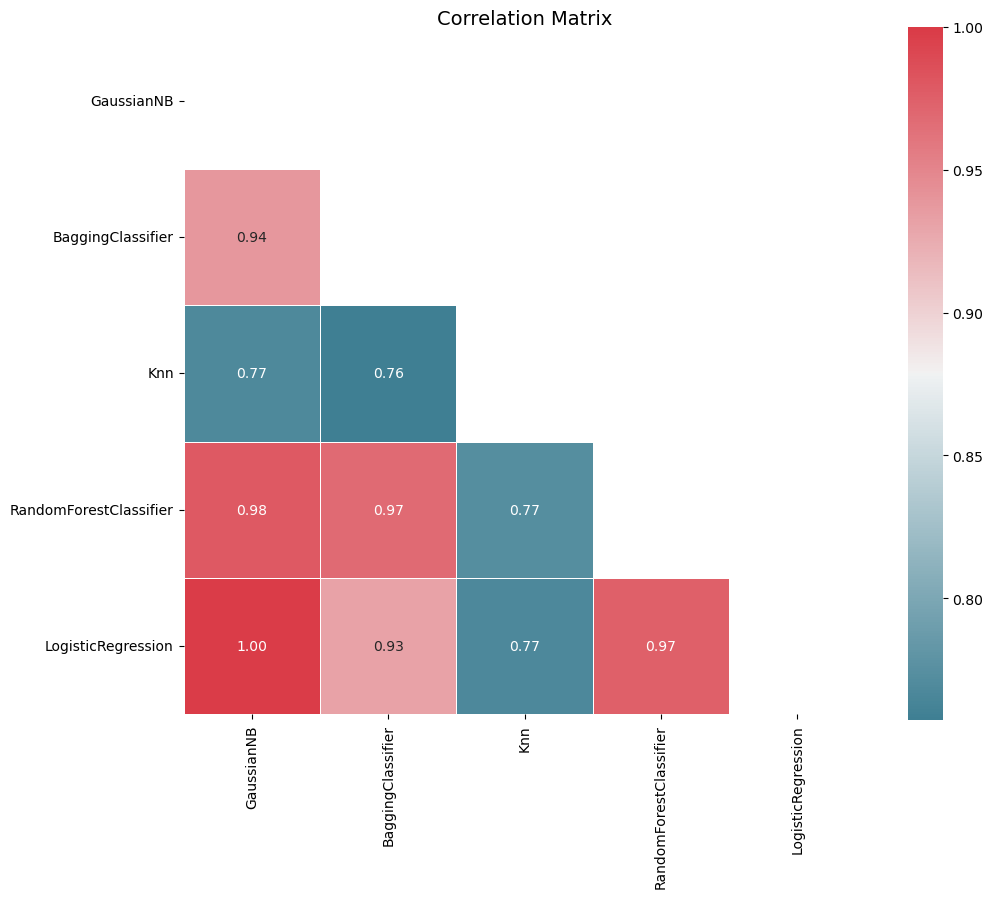

In [190]:
corrmat(P.corr(), inflate=False)
plt.show()

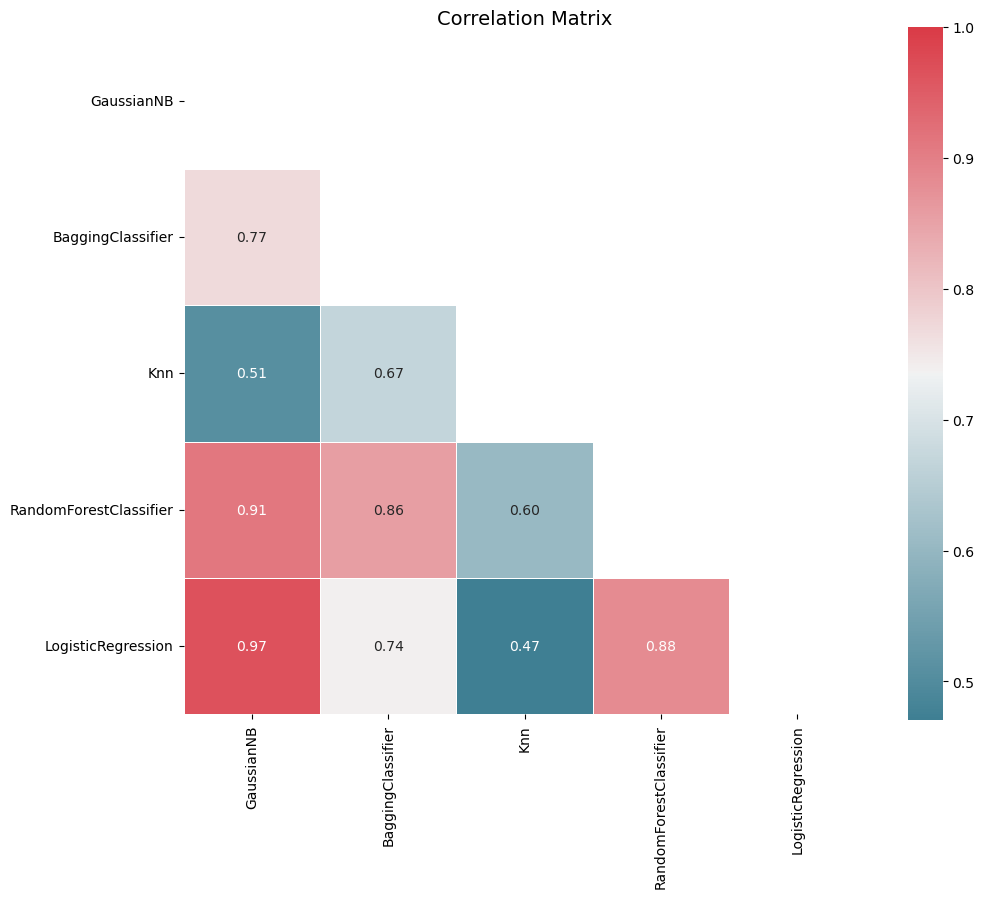

In [191]:
corrmat(P.apply(lambda pred: 1*(pred >= 0.5) - y_test).corr(), inflate=False)
plt.show()

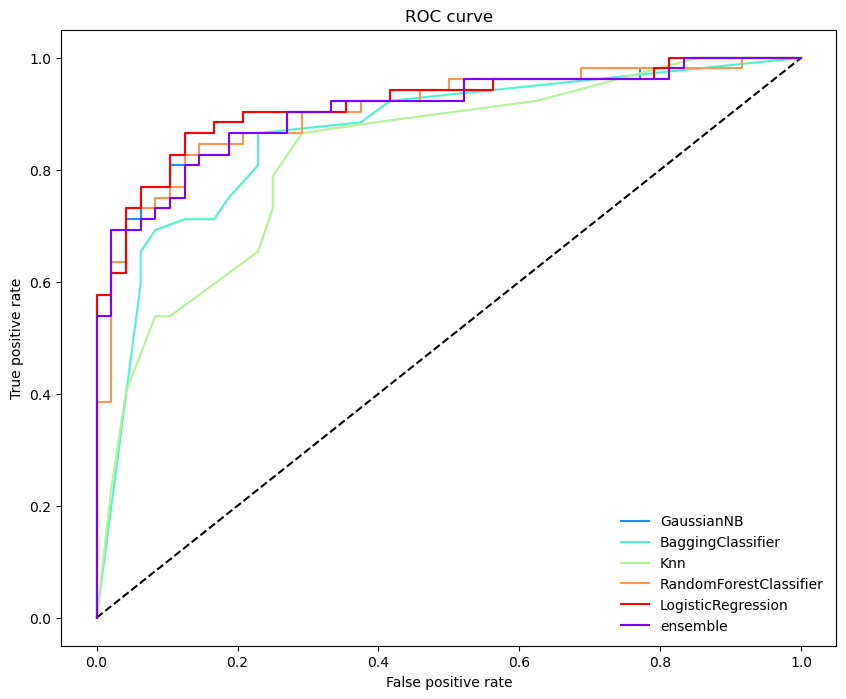

In [192]:
def plot_roc_curve(ytest, P_base_learners, P_ensemble, labels, ens_label):
    """Plot the roc curve for base learners and ensemble."""
    plt.figure(figsize=(10, 8))
    plt.plot([0, 1], [0, 1], 'k--')
    
    cm = [plt.cm.rainbow(i)
      for i in np.linspace(0, 1.0, P_base_learners.shape[1] + 1)]
    
    for i in range(P_base_learners.shape[1]):
        p = P_base_learners[:, i]
        fpr, tpr, _ = roc_curve(y_test, p)
        plt.plot(fpr, tpr, label=labels[i], c=cm[i + 1])

    fpr, tpr, _ = roc_curve(y_test, P_ensemble)
    plt.plot(fpr, tpr, label=ens_label, c=cm[0])
        
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(frameon=False)
    plt.show()


plot_roc_curve(y_test, P.values, P.mean(axis=1), list(P.columns), "ensemble")

In [193]:
def get_models():
    models = list()
    
    models.append(GaussianNB(
        priors = None,
        var_smoothing = 1e-08))
    
    models.append(BaggingClassifier(
        n_estimators = 10))
    
    models.append(KNeighborsClassifier(
        algorithm = 'ball_tree',
        leaf_size = 30,
        n_neighbors =  11,
        weights = 'uniform'))
    
    models.append(RandomForestClassifier(
        criterion = 'gini',
        max_depth = 5,
        max_features = 'sqrt',
        n_estimators = 150 ))

    models.append(LogisticRegression(
        C = 0.5,
        max_iter = 100,
        penalty = 'l1',
        solver = 'liblinear'))
    return models

In [194]:
def get_super_leaner(x):
    ensemble = SuperLearner(
        scorer = accuracy_score
    )
    
    models = get_models()
    ensemble.add(models)
    ensemble.add_meta(LogisticRegression(solver='lbfgs'))
    return ensemble

In [195]:
ensemble = get_super_leaner(x_train)

In [196]:
ensemble.fit(x_train, y_train)

SuperLearner(array_check=None, backend=None, folds=2,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=None, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=2, raise_on_ex...0FD1550>)],
   n_jobs=-1, name='group-1', raise_on_exception=True, transformers=[])],
   verbose=0)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=None, sample_size=20,
       scorer=<function accuracy_score at 0x00000240C0FD1550>,
       shuffle=False, verbose=False)

In [197]:
print(ensemble.data)

                                   score-m  score-s  ft-m  ft-s  pt-m  pt-s
layer-1  baggingclassifier            0.88     0.00  0.21  0.00  0.00  0.00
layer-1  gaussiannb                   0.89     0.01  0.00  0.00  0.00  0.00
layer-1  kneighborsclassifier         0.79     0.01  0.00  0.00  0.16  0.01
layer-1  logisticregression           0.90     0.00  0.00  0.00  0.00  0.00
layer-1  randomforestclassifier       0.88     0.01  0.45  0.02  0.04  0.00



In [198]:
yhat = ensemble.predict(x_test)
print('Super Learner: accuracy %.3f' % (accuracy_score(y_test, yhat) * 100))

Super Learner: accuracy 85.000


In [199]:
print('confusion_matrix', confusion_matrix(y_test, yhat))
print('Precision score', precision_score(y_test, yhat))
print('Recall_score', recall_score(y_test, yhat))
print('Accuracy_score', accuracy_score(y_test, yhat))
print('f1_score', f1_score(y_test, yhat))

confusion_matrix [[43  5]
 [10 42]]
Precision score 0.8936170212765957
Recall_score 0.8076923076923077
Accuracy_score 0.85
f1_score 0.8484848484848485


In [200]:
algorithms_model_list.append('Super Leaner')
roc_auc_score_list.append(round(roc_auc_score(y_test, yhat), 3))
precision_score_list.append(round(precision_score(y_test, yhat), 3))
recall_score_list.append(round(recall_score(y_test, yhat), 3))
f1_score_list.append(round(f1_score(y_test, yhat), 3))

## Model Evaluation

In [201]:
model_results = pd.DataFrame({'Model': algorithms_model_list, 
                             'roc_auc_score': roc_auc_score_list,
                             'precision_score': precision_score_list,
                             'recall_score': recall_score_list,
                             'f1_score': f1_score_list})
model_results

,Model,roc_auc_score,precision_score,recall_score,f1_score
0,GaussianNB,0.861,0.880,0.846,0.863
1,BaggingClassifier,0.862,0.913,0.808,0.857
2,KNeighborsClassifier,0.832,0.872,0.788,0.828
3,RandomForestClassifier,0.861,0.896,0.827,0.860
4,LogisticRegression,0.870,0.882,0.865,0.874
5,Super Leaner,0.852,0.894,0.808,0.848


### Test set results

In [202]:
roc_auc_score_list.append(round(roc_auc_score(y_test, yhat), 3))
precision_score_list.append(round(precision_score(y_test, yhat), 3))
recall_score_list.append(round(recall_score(y_test, yhat), 3))
f1_score_list.append(round(f1_score(y_test, yhat), 3))

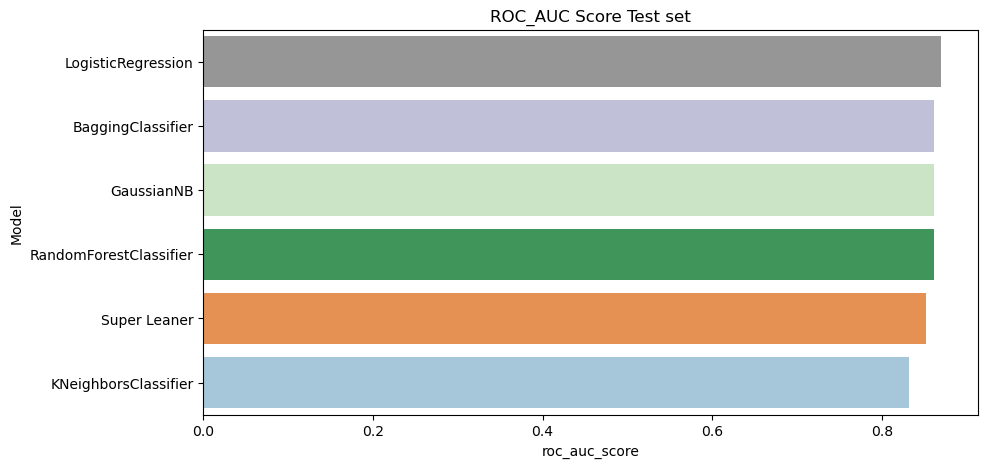

In [203]:
plt.figure(figsize=(10, 5))
sns.barplot(data = model_results.sort_values(by ='roc_auc_score', ascending = False), 
            x = 'roc_auc_score', y = 'Model', palette = 'tab20c_r')
plt.title("ROC_AUC Score Test set")
plt.show() 

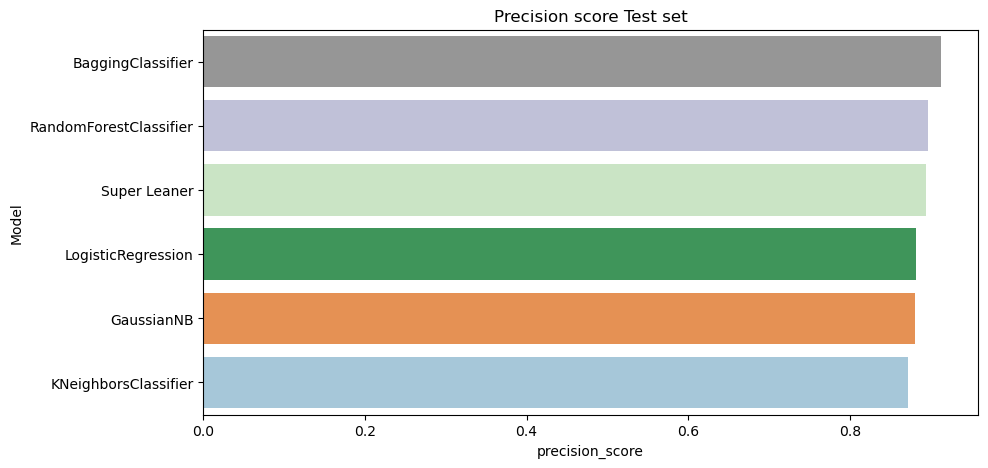

In [204]:
plt.figure(figsize=(10, 5))
sns.barplot(data = model_results.sort_values(by ='precision_score', ascending = False), 
            x = 'precision_score', y = 'Model', palette = 'tab20c_r')
plt.title("Precision score Test set")
plt.show()

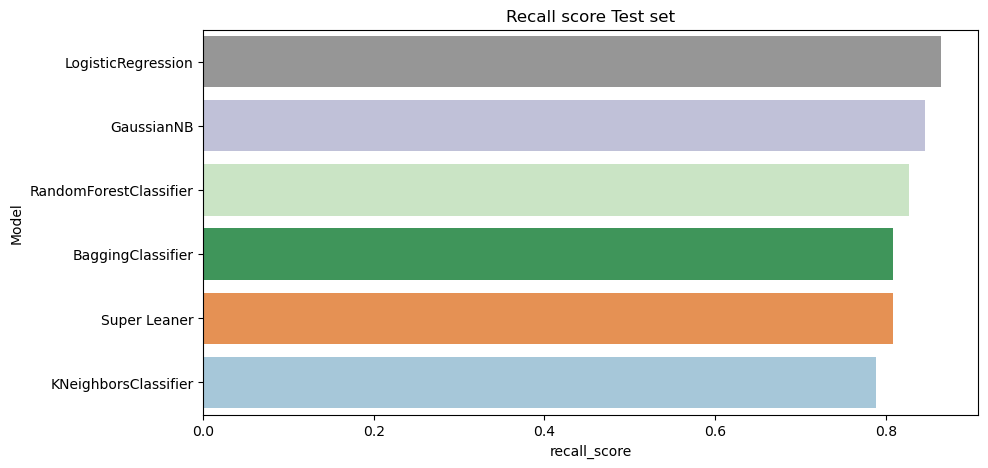

In [205]:
plt.figure(figsize=(10, 5))
sns.barplot(data = model_results.sort_values(by ='recall_score', ascending = False), 
            x = 'recall_score', y = 'Model', palette = 'tab20c_r')
plt.title("Recall score Test set")
plt.show()

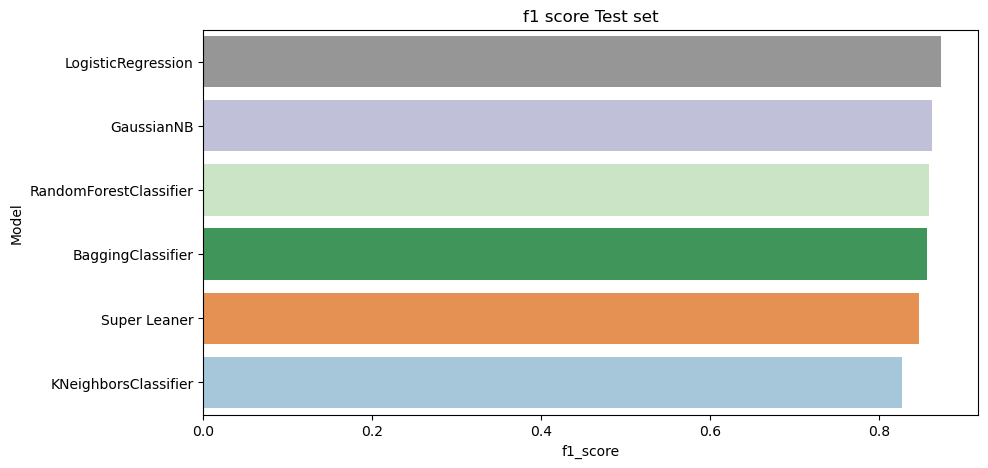

In [206]:
plt.figure(figsize=(10, 5))
sns.barplot(data = model_results.sort_values(by ='f1_score', ascending = False), 
            x = 'f1_score', y = 'Model', palette = 'tab20c_r')
plt.title("f1 score Test set")
plt.show()

### According to the results, the best model is 

1. NAÏVE BAYES CLASSIFICATION ​

2. LOGISTIC REGRESSION ​

3. RANDOM FOREST  CLASSIFICATION  ​